# DS 2500 HW 4

Due: Fri Mar 3 @ 11:59PM

### Submission Instructions
Please submit both of the following to the corresponding [gradescope](https://www.gradescope.com/courses/478298) assignment:
- this `.ipynb` file 
    - give a fresh `Kernel > Restart & Run All` just before uploading
- a `.py` file consistent with your `.ipynb`
    - `File > Download as ...`
    
Gradescope may run your `.py` submission to determine part of your score for this assignment.  See the [autograder instructions](https://github.com/matthigger/gradescope_auto_py/blob/main/stud_instruct.md) for details.


### Tips for success
- Start early
- Make use of [Piazza](https://course.ccs.neu.edu/ds2500/admin_piazza.html)
- Make use of [Office Hours](https://course.ccs.neu.edu/ds2500/office_hours.html)
- Remember that [Documentation / style counts for credit](https://course.ccs.neu.edu/ds2500/python_style.html)
- [No student may view or share their ungraded homework with another](https://course.ccs.neu.edu/ds2500/syllabus.html#academic-integrity-and-conduct)

### This HW has 83 points

## Part 1: Covariance Matching (18 auto points)

Match each of the covariance matrices to the dataset which is most consistent.  Note that all scatterplots below have equal scales in the x and y axes (moving an inch to the right increases $x_0$ as much as moving an inch up increases $x_1$).  

Please express your response as dictionary named `part1_dict` whose keys are uppercase letters and values are numbers from 0 to 8.  For example:

```python
part1_dict = {'A': 0, 'B': 2, 'C': 1}
```

indicates that data set A is associated with $\Sigma_0$.  This dictionary allows us to automatically grade your responses here.  Note that your scores on this question will only be visible after the late submission deadline.

### Please submit a file named `hw4_stud.py` to gradescope to grade this question

<img src="https://i.ibb.co/K7DY3mx/cov3by3.png" alt="Drawing" style="width: 600px;"/>


$$\Sigma_0 =\begin{bmatrix} 
5 & 1\\ 
1 & 2
\end{bmatrix}, 
\Sigma_1 =\begin{bmatrix} 
4 & 0\\ 
0 & 0
\end{bmatrix}, 
\Sigma_2 =\begin{bmatrix} 
1 & -1\\ 
-1 & 7
\end{bmatrix}, 
\Sigma_3 =\begin{bmatrix} 
7 & 4\\ 
4 & 5
\end{bmatrix}, 
\Sigma_4 =\begin{bmatrix} 
5 & 3\\ 
3 & 2
\end{bmatrix}$$

$$\Sigma_5 =\begin{bmatrix} 
6 & 2\\ 
2 & 6
\end{bmatrix}, 
\Sigma_6 =\begin{bmatrix} 
4 & -2\\ 
-2 & 5
\end{bmatrix}, 
\Sigma_7 =\begin{bmatrix} 
1 & -2\\ 
-2 & 5
\end{bmatrix}, 
\Sigma_8 =\begin{bmatrix} 
2 & 0\\ 
0 & 2
\end{bmatrix}$$

In [1]:
part1_dic = {'A': 4, 'B': 7, 'C': 5, 'D': 8, "E": 3, "F": 6, "G": 1, "H": 0 , "I": 2}

# Part 2: Scale in Covariance & Correlation (15 points + 1)

This problem uses `covid_data.csv` which measures the total new daily COVID cases each day in Massachusetts, California and NEU.  

For example, if feature `MA` is 1 on 3/16/2021 then there was 1 reported new COVID case on 3/16/2021.

In [2]:
import pandas as pd

df_covid = pd.read_csv('covid_data.csv', index_col='date')

In [3]:
df_covid.cov()

,MA,CA,NEU
MA,4.217750e+06,2.351385e+07,6864.562272
CA,2.351385e+07,1.980773e+08,40762.364969
NEU,6.864562e+03,4.076236e+04,30.653335


One might (incorrectly) reason:

    "The covariance between MA and CA is about 23 million, which is much larger than the covariance between CA and NEU (about 4 thousand).  Therefore, I conclude that infections in MA and CA must change more consistently together than CA and NEU."

Identify and correct this interpretation by writing three or four sentences which:
- correctly identify the thinking error:
    - why is cov(MA, CA) > cov(CA, NEU)?
    - what should we use to measure the consistency with which values change?
- clearly explain / teach the difference so that a non-technical audience may understand
- utilize a few python commands to illustrate your language with numerical examples

Bonus (+1 point): Hypothesize why NU's relationship to the other states is different than between MA and CA.

In [4]:
df_covid.corr()

,MA,CA,NEU
MA,1.000000,0.813516,0.603717
CA,0.813516,1.000000,0.523122
NEU,0.603717,0.523122,1.000000


## Response:
Covariance is an indicator of dependency between two variables. The covariance between MA and CA is greater than the covariance of CA and NEU because MA and CA are both states with large population and smaller variance. In the other hand, NEU only has a population of a few thousands compared to CA's population of millions. Therefore, there is a smaller relationship between NEU and CA and a larger variance. In addition, there is a different of scale/range. To solve this change in scale, we can use correlation to maintain the consistency with the weight of each value. Based on the corr() code, we see that CA and MA (corr = 0.81) have a strong correlation than CA and NEU (0.52).

Bonus: NU's relationship with other states is different from MA and CA because of the difference in population and demographics, leading to greater variance (aka bigger spread between numbers in the data set). MA and CA are states with all types of people while NEU is a university of students. People, who often go out, will have a higher chance of getting infected. In additional, age plays a role since older age people are more likely to get covid than younger people. Thus, a difference in demographics (age) caused a inconsistent between NEU's relationship with other states.


# Part 3: Beans!

In this problem we'll use the k-Nearest Neighbor classifier to classify the species of plant that a bean comes from [a very large collection of bean image data](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset).
- use the csv loaded below
- each subpart requires the completion of all previous sub-parts
- **you are intended to make scale normalization / cross validation errors in earlier parts**
    - these will be addressed in later parts

In [5]:
import pandas as pd

df_bean = pd.read_csv('dry_bean.csv')

df_bean.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## Part 3.1: a not-quite-right K-NN classifier  (12 points)
Build a 21-Nearest Neighbor classifier which is `fit` and `predict`s on the whole, raw dataset.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
k = 21
x_feat_list = df_bean.columns[:-1]
y_feat = 'Class'

x = df_bean.loc[:, x_feat_list].values
y_true = df_bean.loc[:, y_feat].values

# initalize a knn_classifer
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# fits happens inplace
knn_classifier.fit(x, y_true)

# predict the class
y_pred = knn_classifier.predict(x)

## Part 3.2: Confusion Matrix (12 points)
Plot the confusion matrix which results part 3.1.

Using the confusion matrix, identify the bean with lowest accuracy (% of these beans classified correctly)
- explicitly compute accuracy for this particular bean
    - you may manually copy and paste values from the confusion matrix into a new cell
        - e.g. `387 / (387 + 3 + 10)` or similar
- telling which other bean it is most commonly mistaken for

Your response should be one or two sentences.

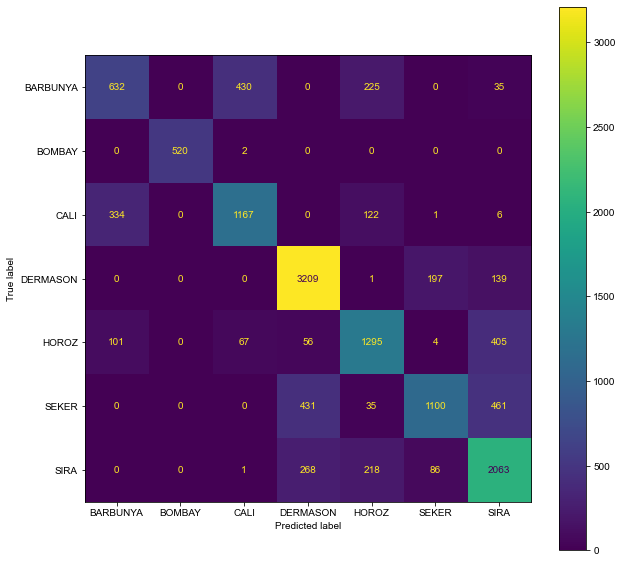

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
# plot the confusion matrix
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels = np.unique(y_true))
conf_mat_disp.plot()

# adjust size
plt.gcf().set_size_inches(10,10)
sns.set(font_scale = 1.2)
plt.grid(False)

In [9]:
# compute all the beans

barbunya = 632/(632+430+225+35)
bombay = 520/(520+2)
cali = 1167/(1167+334+122+1+6)
dermason = 3209/(3209+1+197+139)
horoz = 1295/(101+67+56+1295+4+405)
seker = 1100/(1100+431+35+461)
sire = 2063/ (2063+1+268+218+86)

print('barbunya:', barbunya, 'bombay:', bombay, 'cali:', cali, 
      'dermason:', dermason, 'horoz:', horoz, 'seker:', seker, 'sire:', sire)

barbunya: 0.47806354009077157 bombay: 0.9961685823754789 cali: 0.7159509202453987 dermason: 0.9049633389734912 horoz: 0.6716804979253111 seker: 0.5426739023186976 sire: 0.7826251896813353


### Response:
Barbunya bean has the lowest accuracy of 47.8%.

## Part 3.3: Scale Normalization (10 points)
- In a few sentences, describe how the scale of the data may be causing issues in the classifier's performance. 
    - Explicitly compute the variance of the raw `df_bean` dataset and refer to it in your explanation.
- Build a new dataframe which resolves this issue
    - don't retrain and assess the classifier just yet ... we have another problem to fix too (see part 3.4)

### Response:
In part 3.2, the scale of the data are different for each species because the scale was not normalize. This caused data with different units in different range to have a big variance. As shown below in df_bean.var, the variance for each column is different. It indicates that each variable has a different weight and can steer the model to one direction because of bigger number. However, after normalizing the scale, the variance of each column is 1, showing equivalent weight for each variable.


In [10]:
# variance before normalization
df_bean.var()

/var/folders/9m/1hg1hctj5s94qtlnx8n6561h0000gn/T/ipykernel_11804/1461227889.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_bean.var()


Area               8.599026e+08
Perimeter          4.592007e+04
MajorAxisLength    7.343494e+03
MinorAxisLength    2.022309e+03
AspectRation       6.085026e-02
Eccentricity       8.464324e-03
ConvexArea         8.865456e+08
EquivDiameter      3.501932e+03
Extent             2.409471e-03
Solidity           2.171913e-05
roundness          3.542617e-03
Compactness        3.808552e-03
ShapeFactor1       1.272380e-06
ShapeFactor2       3.550668e-07
ShapeFactor3       9.800238e-03
ShapeFactor4       1.906595e-05
dtype: float64

In [11]:
# normalize scale
for feat in x_feat_list:
    df_bean[feat] = df_bean[feat] / df_bean[feat].std()

In [12]:
# see result
df_bean.loc[:, x_feat_list].values

array([[  0.9683163 ,   2.84797175,   2.42931436, ...,   5.28179555,
          8.42681644, 228.72633757],
       [  0.97987676,   2.97736201,   2.34000467, ...,   5.98049015,
          9.19076653, 228.65910743],
       [  1.00190643,   2.91245922,   2.4835539 , ...,   5.11472029,
          8.34245183, 228.8047188 ],
       ...,
       [  1.43700936,   3.54343216,   3.28540291, ...,   3.16890471,
          6.83747965, 228.27823415],
       [  1.43728217,   3.56423577,   3.30690622, ...,   3.10807792,
          6.75012797, 227.92443601],
       [  1.43769139,   3.60370571,   3.44413962, ...,   2.75193975,
          6.22469247, 228.6016906 ]])

In [13]:
# variance after normalization
df_bean.var()

/var/folders/9m/1hg1hctj5s94qtlnx8n6561h0000gn/T/ipykernel_11804/1461227889.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_bean.var()


Area               1.0
Perimeter          1.0
MajorAxisLength    1.0
MinorAxisLength    1.0
AspectRation       1.0
Eccentricity       1.0
ConvexArea         1.0
EquivDiameter      1.0
Extent             1.0
Solidity           1.0
roundness          1.0
Compactness        1.0
ShapeFactor1       1.0
ShapeFactor2       1.0
ShapeFactor3       1.0
ShapeFactor4       1.0
dtype: float64

## Part 3.4: Cross Validation (16 points)
In a few sentences, describe how the confusion matrix shown in part 3.2 may overstate how accurate the classifier would be in predicting the species of some new bean.

Copy and paste the code from parts 3.1 & 3.2 (don't worry about DRY here) to resolve the issues raised in parts 3.3 and 3.4.

Confusion matrix shown in part 3.2 may overstate the accuracy in predicting the species of some new beans because only 1/3 of beans has can accuracy of above 90%. Since the values were not normalized, all variables have different weights associated with the values. 

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from copy import copy

In [15]:
k = 21
x_feat_list = df_bean.columns[:-1]
y_feat = 'Class'

# normalize scale
for feat in x_feat_list:
    df_bean[feat] = df_bean[feat] / df_bean[feat].std()
    
# extract data
x = df_bean.loc[:, x_feat_list].values
y = df_bean.loc[:, y_feat].values

# initalize a knn_classifer
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# construction of kfold object
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# initialize an array of same shape and type as y
y_pred = np.copy(y)

for train_idx, test_idx in kfold.split(x, y):
    # split into train and test sets
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    x_test = x[test_idx, :]
    
    # fit classifier (on training set)
    knn_classifier.fit(x_train, y_train)
    
    # predict (on testing set)
    y_pred[test_idx] = knn_classifier.predict(x_test)

In [16]:
# test
k = 21
x_feat_list = df_bean.columns[:-1]
y_feat = 'Class'

# extract data
x = df_bean.loc[:, x_feat_list].values
y_true = df_bean.loc[:, y_feat].values

# initalize a knn_classifer
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# construction of kfold object
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# initialize an array of same shape and type as y
y_pred = copy(y_true)

for train_idx, test_idx in kfold.split(x, y_true):
    # build arrays which correspond to x, y train /test
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_true_train = y_true[train_idx]
    
    # fit happens "inplace"
    knn_classifier.fit(x_train, y_true_train)

    # estimate each plant's species
    y_pred[test_idx] = knn_classifier.predict(x_test)

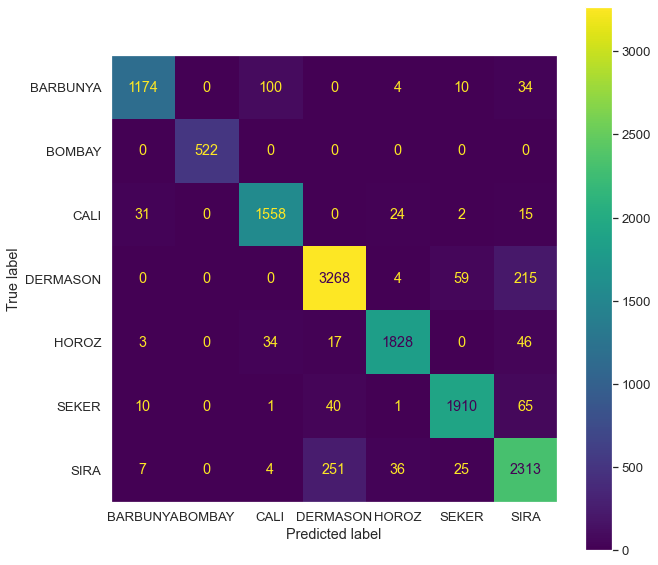

In [17]:
conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
# plot the confusion matrix
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels = np.unique(y_true))
conf_mat_disp.plot()

# adjust size
plt.gcf().set_size_inches(10,10)
sns.set(font_scale = 1.1)
plt.grid(False)

# Part 4: OOP K-NN Classifier (+6 points extra credit)

Build an object oriented implementation of a K-NN classifier.  In the spirit of lab5's programming sequence:

- (+2 points) design an interface for all the behavior needed for a K-NN classifier
    - write pseudocode, docstrings and a few comments first
    - you're welcome to "steal" from sklearn's above
- (+2 points) write a set of `assert` test cases which validate and specify your design
- (+2 points) implement from the skeleton you've made above

In practice, using `sklearn`'s implementation is a almost always a better choice, though we're practicing our python skills here.  In this spirit, do not use anything from `sklearn` in your implementation.